In [ ]:
## Big Data Challenge

In [353]:
# importing all required libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [6]:
# read csv file (given sample_data)
df_CAB = pd.read_csv("./anaconda3/Scripts/sorted_data.csv", names = ['medallion', 'hack_license', 'pickup_datetime', 'dropoff_datetime',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount'], parse_dates = ["pickup_datetime", "dropoff_datetime"])

In [8]:
df_CAB.head()

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.0,0.0,4.5
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.0,0.0,27.5
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0


In [10]:
# remove invalid coordinates
df_CAB = df_CAB[~((np.abs(df_CAB["pickup_longitude"]) > 180) | (np.abs(df_CAB["pickup_latitude"]) > 180) 
       | (np.abs(df_CAB["dropoff_longitude"]) > 180) | (np.abs(df_CAB["dropoff_latitude"]) > 180))]
df_CAB.head()

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.0,0.0,4.5
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.0,0.0,27.5
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0


In [11]:
# center of each grid is 500m apart arranged in a lattice
earths_radius = 6.378136e6
south_500m_gradient = (180*500)/(np.pi*earths_radius)
east_500m_gradient = 4 * south_500m_gradient
origin_lat, origin_lon = 41.474937, -74.913585

In [474]:
## define grid-zones for each of the input points
df_CAB["pkp_lat_zone"] = ((df_CAB["pickup_latitude"] - origin_lat) / south_500m_gradient).round(0).abs().astype(np.int16)+1
df_CAB["pkp_lon_zone"] = ((df_CAB["pickup_longitude"] - origin_lon) / east_500m_gradient).round(0).abs().astype(np.int16)+1
df_CAB["drp_lat_zone"] = ((df_CAB["dropoff_latitude"] - origin_lat) / south_500m_gradient).round(0).abs().astype(np.int16)+1
df_CAB["drp_lon_zone"] = ((df_CAB["dropoff_longitude"] - origin_lon) / east_500m_gradient).round(0).abs().astype(np.int16)+1

df_CAB = df_CAB[~((df_CAB["pkp_lat_zone"] > 300) | (df_CAB["pkp_lon_zone"] > 300) | 
         (df_CAB["drp_lat_zone"] > 300) | (df_CAB["drp_lon_zone"] > 300))]

df_CAB["pkp_zone"] = df_CAB["pkp_lat_zone"].astype(str).str.cat(df_CAB["pkp_lon_zone"].astype(str), '.')
df_CAB["drp_zone"] = df_CAB["drp_lat_zone"].astype(str).str.cat(df_CAB["drp_lon_zone"].astype(str), '.')

In [476]:
## select top 10 most frequent routes as per pickup and dropoff zone
str_time = df_CAB['pickup_datetime'].min()
end_time = df_CAB['pickup_datetime'].min() + datetime.timedelta(minutes=30)
import time
start_time = time.time()
last30min = df_CAB[df_CAB['pickup_datetime'].between(str_time,end_time)]
mstfrqrt = last30min.groupby(['pkp_zone','drp_zone'],as_index = False).count()
top10frqrt = mstfrqrt.nlargest(10,"dropoff_datetime" )

top10frqrt = top10frqrt[['pkp_zone','drp_zone','pickup_datetime','dropoff_datetime']]


In [477]:
top10frqrt

,pkp_zone,drp_zone,pickup_datetime,dropoff_datetime
1593,162.53,162.53,28,28
1925,164.53,163.52,18,18
1745,163.53,163.53,17,17
2038,165.52,163.52,17,17
2191,166.52,166.52,17,17
1245,160.53,162.53,16,16
1246,160.53,163.53,15,15
2052,165.52,168.52,15,15
1415,161.53,163.53,14,14
1923,164.53,162.53,14,14


In [478]:
## selecting pickup_datetime, dropoff_datetime and delay for top 10 most frequent routes
import time

for i in top10frqrt.index:
    start_time = time.time()
    top10frqrt.loc[i,"pickup_datetime"] = df_CAB.iloc[i]["pickup_datetime"]
    top10frqrt.loc[i,"dropoff_datetime"] = df_CAB.iloc[i]["dropoff_datetime"]
    top10frqrt.loc[i,"delay"] = (time.time() - start_time)
top10frqrt

,pkp_zone,drp_zone,pickup_datetime,dropoff_datetime,delay
1593,162.53,162.53,2013-01-01 00:07:00,2013-01-01 00:22:00,0.033904
1925,164.53,163.52,2013-01-01 00:14:00,2013-01-01 00:24:00,0.000000
1745,163.53,163.53,2013-01-01 00:14:00,2013-01-01 00:23:00,0.000000
2038,165.52,163.52,2013-01-01 00:14:00,2013-01-01 00:25:00,0.000000
2191,166.52,166.52,2013-01-01 00:12:00,2013-01-01 00:25:00,0.000000
1245,160.53,162.53,2013-01-01 00:14:00,2013-01-01 00:21:00,0.000000
1246,160.53,163.53,2013-01-01 00:01:00,2013-01-01 00:21:00,0.000000
2052,165.52,168.52,2013-01-01 00:08:00,2013-01-01 00:25:00,0.000000
1415,161.53,163.53,2013-01-01 00:09:00,2013-01-01 00:21:00,0.000000
1923,164.53,162.53,2013-01-01 00:19:00,2013-01-01 00:24:00,0.015620


In [481]:
## representing top10 most frequent routes on map
top10frqrtcopy  = top10frqrt.copy()
for i in top10frqrtcopy.index:
    
    top10frqrtcopy.loc[i,"pickup_longitude"] = df_CAB.iloc[i]["pickup_longitude"]
    top10frqrtcopy.loc[i,"pickup_latitude"] = df_CAB.iloc[i]["pickup_latitude"]
    top10frqrtcopy.loc[i,"dropoff_longitude"] = df_CAB.iloc[i]["dropoff_longitude"]
    top10frqrtcopy.loc[i,"dropoff_latitude"] = df_CAB.iloc[i]["dropoff_latitude"]
top10frqrtcopy



,pkp_zone,drp_zone,pickup_datetime,dropoff_datetime,delay,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1593,162.53,162.53,2013-01-01 00:07:00,2013-01-01 00:22:00,0.033904,-73.993584,40.721275,-73.966202,40.758560
1925,164.53,163.52,2013-01-01 00:14:00,2013-01-01 00:24:00,0.000000,-73.990211,40.737061,-74.007782,40.707626
1745,163.53,163.53,2013-01-01 00:14:00,2013-01-01 00:23:00,0.000000,-73.992867,40.737286,-73.993286,40.717960
2038,165.52,163.52,2013-01-01 00:14:00,2013-01-01 00:25:00,0.000000,-73.970970,40.798344,-73.924736,40.867428
2191,166.52,166.52,2013-01-01 00:12:00,2013-01-01 00:25:00,0.000000,-73.974388,40.759598,-73.955612,40.814247
1245,160.53,162.53,2013-01-01 00:14:00,2013-01-01 00:21:00,0.000000,-73.974525,40.742130,-73.988228,40.720306
1246,160.53,163.53,2013-01-01 00:01:00,2013-01-01 00:21:00,0.000000,-73.977486,40.738300,-73.996658,40.762611
2052,165.52,168.52,2013-01-01 00:08:00,2013-01-01 00:25:00,0.000000,-73.995552,40.764729,-73.935081,40.847511
1415,161.53,163.53,2013-01-01 00:09:00,2013-01-01 00:21:00,0.000000,-73.989540,40.726151,-73.904572,40.738586
1923,164.53,162.53,2013-01-01 00:19:00,2013-01-01 00:24:00,0.015620,-73.993416,40.745007,-74.005356,40.728298


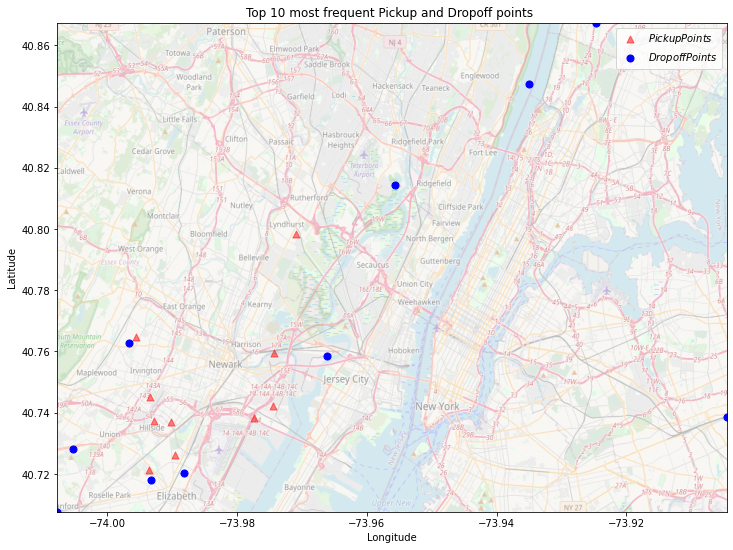

In [485]:
## extracting min , max longtitude and latitude for extracting geomap
BBox = ((top10frqrtcopy.dropoff_longitude.min(), top10frqrtcopy.dropoff_longitude.max(),top10frqrtcopy.dropoff_latitude.min(), top10frqrtcopy.dropoff_latitude.max()))

# creating scatter plot over geomap
ruh_m = plt.imread('./anaconda3/Scripts/maps4.png')
fig, ax = plt.subplots(figsize = (12,9))
ax.scatter(top10frqrtcopy.pickup_longitude, top10frqrtcopy.pickup_latitude, marker = "^", zorder=1, alpha= 0.5, c='r', s=50)
ax.scatter(top10frqrtcopy.dropoff_longitude, top10frqrtcopy.dropoff_latitude, zorder=1, alpha= 1, c='b', s=50)
ax.set_title('Top 10 most frequent Pickup and Dropoff points ')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.legend(["$Pickup Points $", "$Dropoff Points$"])
ax.imshow(ruh_m, zorder=0, extent=BBox2, aspect= 'auto',alpha= 0.5)
plt.show()